## Handwritten digits recognition

The MNIST dataset is a built-in dataset provided by Keras. It consists of 70,000 28x28 grayscale images, each of which displays a single handwritten digit from 0 to 9. The training set consists of 60,000 images, while the test set has 10,000 images.

### Importing the libraries required

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Importing the data and splitting it into test and train

In [22]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_test.shape

(10000, 28, 28)

In [25]:
x_train[9].shape

(28, 28)

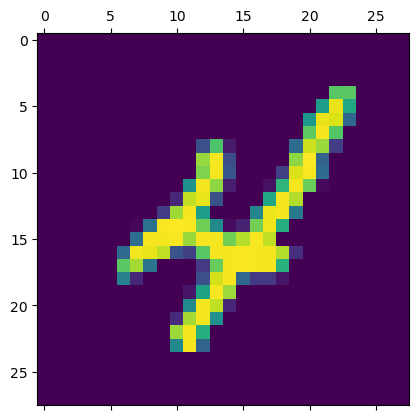

In [26]:
plt.matshow(x_train[9])

In [27]:
y_train[9]

4

In [28]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [29]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

#### Normalizing the pixel values of image

In [30]:
x_train=x_train/255
x_test=x_test/255

#### Using ANN for classification

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9219
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1099 - accuracy: 0.9671
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0624 - accuracy: 0.9803
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0505 - accuracy: 0.9832
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0342 - accuracy: 0.9885
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9908
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9793


[0.10543031990528107, 0.9793000221252441]

In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

#### Using CNN for Classification

In [31]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1815 - accuracy: 0.9446
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0582 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0392 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0105 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 34s 18m

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9844


[0.07455722987651825, 0.9843999743461609]

In [34]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[3.18229169e-04, 1.10562645e-01, 3.05064172e-02, 6.90409899e-01,
        3.25441360e-03, 6.08511688e-03, 6.63900546e-10, 1.00000000e+00,
        5.42718777e-03, 1.25792692e-03],
       [3.40180039e-01, 7.83480048e-01, 1.00000000e+00, 2.22098297e-05,
        4.51498210e-01, 9.99806275e-07, 1.14419498e-03, 8.28368764e-04,
        9.83522856e-04, 9.07149911e-03],
       [1.63607404e-03, 9.99999642e-01, 1.49015861e-04, 3.36460676e-03,
        9.02684033e-02, 5.99338207e-04, 2.88293650e-03, 5.43371327e-02,
        3.49418516e-03, 1.80229265e-02],
       [1.00000000e+00, 2.16216780e-03, 1.14935357e-03, 2.40270147e-05,
        3.80735801e-05, 2.14404121e-04, 1.01287523e-02, 9.31174029e-04,
        2.45555366e-05, 3.16390465e-03],
       [3.57457846e-01, 1.51728159e-02, 9.27339852e-01, 8.34798157e-01,
        1.00000000e+00, 1.95774162e-04, 2.79140342e-02, 5.40163279e-01,
        9.84093010e-01, 9.72773492e-01]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:7]

[7, 2, 1, 0, 4, 1, 4]

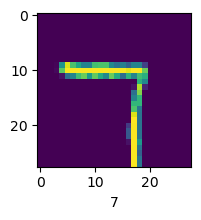

In [37]:
plot_sample(x_test, y_test,4530)

In [38]:
classes[y_classes[4530]]

7

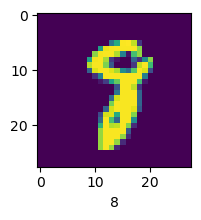

In [39]:
plot_sample(x_test, y_test,435)

In [40]:
classes[y_classes[435]]

8

In [41]:
import pickle
# open a file, where you ant to store the data
file = open('handwritten-digits.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)